In [1]:
import sys 

# check the version of python
print('Python version',sys.version)

('Python version', '2.7.13 |Anaconda, Inc.| (default, Sep 21 2017, 17:38:20) \n[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]')


- Decision Tress are used for classification and regression.
- They learn a hierarchy of if/else questions, leading to a decision.

In [25]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split

from sklearn.tree import export_graphviz

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

#create the dataset
X = cancer.data
y = cancer.target

In [4]:
print "Shape of X: {}".format(X.shape)
print "Shape of y: {}".format(y.shape)

Shape of X: (569, 30)
Shape of y: (569,)


In [5]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify= y, random_state=42)

In [6]:
#build the model
tree = DecisionTreeClassifier(random_state=0)

In [7]:
#fit the model
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [8]:
print "Accuracy on train set: {:.3f}".format(tree.score(X_train, y_train))
print "Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test))

Accuracy on train set: 1.000
Accuracy on test set: 0.937


In [9]:
# visualize the tree

export_graphviz(tree, out_file = "tree.dot", class_names=["malignant", "bening"],
               feature_names=cancer.feature_names, impurity=False, filled=True)

import graphviz

with open('tree.dot') as f:
    dot_graph = f.read()
    graphviz.Source(dot_graph)

ImportError: No module named graphviz

In [11]:
# feature importance
print "Feature importance: \n{}".format(tree.feature_importances_)

Feature importance: 
[ 0.          0.00752597  0.          0.          0.00903116  0.
  0.00752597  0.          0.          0.          0.00975731  0.04630969
  0.          0.00238745  0.00231135  0.          0.          0.          0.
  0.00668975  0.69546322  0.05383211  0.          0.01354675  0.          0.
  0.01740312  0.11684357  0.01137258  0.        ]


In [26]:
def plot_feature_importance(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

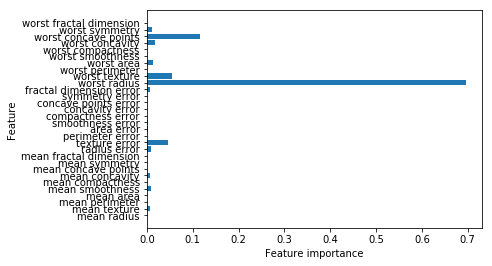

In [27]:
plot_feature_importance(tree)